# Part 2: Pandas, Functions, and Histograms
by Leslie Kerby with some material adapted from Berkeley Data Science

## 1. Pandas DataFrames

For a collection of things in the world, an array is useful for describing a single attribute of each thing. For example, among the collection of US States, an array could describe the land area of each. DataFrames extend this idea by describing multiple attributes for each element of a collection.

In most data science applications, we have data about many entities, but we also have several kinds of data about each entity.

### 1.1. Reading In and Exploring Data in Pandas

We read data into a `pandas DataFrame` with the `read_csv` method. We will first look at the full NBA Salary dataset we explored with NumPy in Part 1. The column titles are commonly called `labels` and the row titles are called the `index`.

In [3]:
import numpy as np
import pandas as pd
pd.read_csv('NBA_season1718_salary.csv')

Unnamed: 0               Player   Tm  season17_18
0             1        Stephen Curry  GSW   34682550.0
1             2         LeBron James  CLE   33285709.0
2             3         Paul Millsap  DEN   31269231.0
3             4       Gordon Hayward  BOS   29727900.0
4             5        Blake Griffin  DET   29512900.0
5             6           Kyle Lowry  TOR   28703704.0
6             7    Russell Westbrook  OKC   28530608.0
7             8          Mike Conley  MEM   28530608.0
8             9         James Harden  HOU   28299399.0
9            10        DeMar DeRozan  TOR   27739975.0
10           11           Al Horford  BOS   27734405.0
11           12      Carmelo Anthony  OKC   26243760.0
12           13       Damian Lillard  POR   26153057.0
13           14         Jrue Holiday  NOP   25686667.0
14           15           Chris Bosh  MIA   25289390.0
15           16         Kevin Durant  GSW   25000000.0
16           17          Otto Porter  WAS   24773250.0
17           18           Chris Paul  HOU   24599495.0
18           19        C.J. McCollum  POR   23962573.0
19           20         Bradley Beal  WAS   23775506.0
20           21        Anthony Davis  NOP   23775506.0
21           22       Andre Drummond  DET   23775506.0
22           23     Hassan Whiteside  MIA   23775506.0
23           24        Dwight Howard  CHO   23500000.0
24           25     Chandler Parsons  MEM   23112004.0
25           26      Harrison Barnes  DAL   23112004.0
26           27          J.J. Redick  PHI   23000000.0
27           28           Marc Gasol  MEM   22642350.0
28           29           Kevin Love  CLE   22642350.0
29           30          Brook Lopez  LAL   22642350.0
..          ...                  ...  ...          ...
543         544          Nigel Hayes  NYK      50000.0
544         545          Jalen Moore  MIL      50000.0
545         546          Gary Payton  MIL      50000.0
546         547        Matt Williams  MIA      50000.0
547         548         Vince Hunter  MEM      50000.0
548         549          Vander Blue  LAL      50000.0
549         550         V.J. Beachem  LAL      50000.0
550         551        Briante Weber  LAL      50000.0
551         552         Jamil Wilson  LAC      50000.0
552         553        Briante Weber  HOU      50000.0
553         554         Luis Montero  DET      50000.0
554         555         Gian Clavell  DAL      50000.0
555         556   Antonius Cleveland  DAL      50000.0
556         557        Diamond Stone  CHI      50000.0
557         558      Yakuba Ouattara  BRK      50000.0
558         559         Jeremy Evans  ATL      50000.0
559         560          Nigel Hayes  LAL      46080.0
560         561          Nigel Hayes  TOR      46080.0
561         562        Rodney Purvis  ORL      46080.0
562         563  Xavier Rathan-Mayes  MEM      46080.0
563         564  Trey McKinney-Jones  IND      46080.0
564         565        Jameel Warney  DAL      46080.0
565         566      Marcus Thornton  CLE      46080.0
566         567      DeAndre Liggins  ATL      26773.0
567         568         Axel Toupane  NOP      25000.0
568         569           Quinn Cook  NOP      25000.0
569         570        Chris Johnson  HOU      25000.0
570         571           Beno Udrih  DET      25000.0
571         572        Joel Bolomboy  MIL      22248.0
572         573         Jarell Eddie  CHI      17224.0

[573 rows x 4 columns]

It might be easier if we clean up the dataset a bit by dropping the first column. This is easy to do with the `drop` method. We can string the `drop` method with our initial `read_csv`. The `axis=1` specifies that we are dropping columns (the default, axis=0, is rows). Note that if we drop the column AFTER reading in the data, we would have to add an optional argument `inplace=True` to make the drop permanent.

In [9]:
salarydf = pd.read_csv('NBA_season1718_salary.csv').drop('Unnamed: 0', axis=1)
# salarydf = pd.read_csv('NBA_season1718_salary.csv')
# salarydf.drop('Unnamed: 0', axis=1, inplace=True)
salarydf

Player   Tm  season17_18
0          Stephen Curry  GSW   34682550.0
1           LeBron James  CLE   33285709.0
2           Paul Millsap  DEN   31269231.0
3         Gordon Hayward  BOS   29727900.0
4          Blake Griffin  DET   29512900.0
5             Kyle Lowry  TOR   28703704.0
6      Russell Westbrook  OKC   28530608.0
7            Mike Conley  MEM   28530608.0
8           James Harden  HOU   28299399.0
9          DeMar DeRozan  TOR   27739975.0
10            Al Horford  BOS   27734405.0
11       Carmelo Anthony  OKC   26243760.0
12        Damian Lillard  POR   26153057.0
13          Jrue Holiday  NOP   25686667.0
14            Chris Bosh  MIA   25289390.0
15          Kevin Durant  GSW   25000000.0
16           Otto Porter  WAS   24773250.0
17            Chris Paul  HOU   24599495.0
18         C.J. McCollum  POR   23962573.0
19          Bradley Beal  WAS   23775506.0
20         Anthony Davis  NOP   23775506.0
21        Andre Drummond  DET   23775506.0
22      Hassan Whiteside  MIA   23775506.0
23         Dwight Howard  CHO   23500000.0
24      Chandler Parsons  MEM   23112004.0
25       Harrison Barnes  DAL   23112004.0
26           J.J. Redick  PHI   23000000.0
27            Marc Gasol  MEM   22642350.0
28            Kevin Love  CLE   22642350.0
29           Brook Lopez  LAL   22642350.0
..                   ...  ...          ...
543          Nigel Hayes  NYK      50000.0
544          Jalen Moore  MIL      50000.0
545          Gary Payton  MIL      50000.0
546        Matt Williams  MIA      50000.0
547         Vince Hunter  MEM      50000.0
548          Vander Blue  LAL      50000.0
549         V.J. Beachem  LAL      50000.0
550        Briante Weber  LAL      50000.0
551         Jamil Wilson  LAC      50000.0
552        Briante Weber  HOU      50000.0
553         Luis Montero  DET      50000.0
554         Gian Clavell  DAL      50000.0
555   Antonius Cleveland  DAL      50000.0
556        Diamond Stone  CHI      50000.0
557      Yakuba Ouattara  BRK      50000.0
558         Jeremy Evans  ATL      50000.0
559          Nigel Hayes  LAL      46080.0
560          Nigel Hayes  TOR      46080.0
561        Rodney Purvis  ORL      46080.0
562  Xavier Rathan-Mayes  MEM      46080.0
563  Trey McKinney-Jones  IND      46080.0
564        Jameel Warney  DAL      46080.0
565      Marcus Thornton  CLE      46080.0
566      DeAndre Liggins  ATL      26773.0
567         Axel Toupane  NOP      25000.0
568           Quinn Cook  NOP      25000.0
569        Chris Johnson  HOU      25000.0
570           Beno Udrih  DET      25000.0
571        Joel Bolomboy  MIL      22248.0
572         Jarell Eddie  CHI      17224.0

[573 rows x 3 columns]

Several useful pandas methods to begin exploring data are `head`, `describe`, and `shape`.

In [13]:
salarydf.head() # default is 5, can show n by passing it as an argument

Player   Tm  season17_18
0   Stephen Curry  GSW   34682550.0
1    LeBron James  CLE   33285709.0
2    Paul Millsap  DEN   31269231.0
3  Gordon Hayward  BOS   29727900.0
4   Blake Griffin  DET   29512900.0

In [14]:
salarydf.describe() # only summarizes numerical columns

season17_18
count  5.730000e+02
mean   5.858946e+06
std    7.162373e+06
min    1.722400e+04
25%    1.312611e+06
50%    2.386864e+06
75%    7.936509e+06
max    3.468255e+07

In [18]:
salarydf.shape

(573, 3)

`len` will return the number of rows in the DataFrame. 

In [20]:
len(salarydf)

573

Another useful method is `tail`, which displays the last five rows of the DataFrame.

In [22]:
salarydf.tail()

Player   Tm  season17_18
568     Quinn Cook  NOP      25000.0
569  Chris Johnson  HOU      25000.0
570     Beno Udrih  DET      25000.0
571  Joel Bolomboy  MIL      22248.0
572   Jarell Eddie  CHI      17224.0

To show one column of the DataFrame, simply index it by the column label:

In [26]:
salarydf['Player']

0            Stephen Curry
1             LeBron James
2             Paul Millsap
3           Gordon Hayward
4            Blake Griffin
5               Kyle Lowry
6        Russell Westbrook
7              Mike Conley
8             James Harden
9            DeMar DeRozan
10              Al Horford
11         Carmelo Anthony
12          Damian Lillard
13            Jrue Holiday
14              Chris Bosh
15            Kevin Durant
16             Otto Porter
17              Chris Paul
18           C.J. McCollum
19            Bradley Beal
20           Anthony Davis
21          Andre Drummond
22        Hassan Whiteside
23           Dwight Howard
24        Chandler Parsons
25         Harrison Barnes
26             J.J. Redick
27              Marc Gasol
28              Kevin Love
29             Brook Lopez
              ...         
543            Nigel Hayes
544            Jalen Moore
545            Gary Payton
546          Matt Williams
547           Vince Hunter
548            Vander Blue
5

This returns a Pandas Series.

To keep several columns of the DataFrame, pass a list of column labels:

In [28]:
salarydf[['Player','Tm']]

Player   Tm
0          Stephen Curry  GSW
1           LeBron James  CLE
2           Paul Millsap  DEN
3         Gordon Hayward  BOS
4          Blake Griffin  DET
5             Kyle Lowry  TOR
6      Russell Westbrook  OKC
7            Mike Conley  MEM
8           James Harden  HOU
9          DeMar DeRozan  TOR
10            Al Horford  BOS
11       Carmelo Anthony  OKC
12        Damian Lillard  POR
13          Jrue Holiday  NOP
14            Chris Bosh  MIA
15          Kevin Durant  GSW
16           Otto Porter  WAS
17            Chris Paul  HOU
18         C.J. McCollum  POR
19          Bradley Beal  WAS
20         Anthony Davis  NOP
21        Andre Drummond  DET
22      Hassan Whiteside  MIA
23         Dwight Howard  CHO
24      Chandler Parsons  MEM
25       Harrison Barnes  DAL
26           J.J. Redick  PHI
27            Marc Gasol  MEM
28            Kevin Love  CLE
29           Brook Lopez  LAL
..                   ...  ...
543          Nigel Hayes  NYK
544          Jalen Moore  MIL
545          Gary Payton  MIL
546        Matt Williams  MIA
547         Vince Hunter  MEM
548          Vander Blue  LAL
549         V.J. Beachem  LAL
550        Briante Weber  LAL
551         Jamil Wilson  LAC
552        Briante Weber  HOU
553         Luis Montero  DET
554         Gian Clavell  DAL
555   Antonius Cleveland  DAL
556        Diamond Stone  CHI
557      Yakuba Ouattara  BRK
558         Jeremy Evans  ATL
559          Nigel Hayes  LAL
560          Nigel Hayes  TOR
561        Rodney Purvis  ORL
562  Xavier Rathan-Mayes  MEM
563  Trey McKinney-Jones  IND
564        Jameel Warney  DAL
565      Marcus Thornton  CLE
566      DeAndre Liggins  ATL
567         Axel Toupane  NOP
568           Quinn Cook  NOP
569        Chris Johnson  HOU
570           Beno Udrih  DET
571        Joel Bolomboy  MIL
572         Jarell Eddie  CHI

[573 rows x 2 columns]

Note that doing this only SELECTS from the DataFrame, it does not overwrite the original DataFrame. This is a common feature of DataFrames to reduce unnecessary copying (we encountered it when using the `drop` method previously). If you wish to change the DataFrame, you have to copy it back into itself (or for methods with the keyword, use `inplace=True`).

In [29]:
# salarydf = salarydf[['Player','Tm']]

### 1.2. Sorting
Let's sort our salary DataFrame by team. We use the pandas `sort_values` method.

In [43]:
salarydf.sort_values('Tm')

Player   Tm  season17_18
334           John Collins  ATL    1936920.0
416          Diamond Stone  ATL    1312611.0
414            Okaro White  ATL    1312611.0
409       Nicolas Brussino  ATL    1312611.0
363        DeAndre' Bembry  ATL    1567200.0
351          Mike Dunleavy  ATL    1662500.0
60           Kent Bazemore  ATL   16910113.0
285  Taurean Waller-Prince  ATL    2422560.0
279        Malcolm Delaney  ATL    2500000.0
278      Richard Jefferson  ATL    2500000.0
70         Dennis Schroder  ATL   15500000.0
200           Mike Muscala  ATL    5000000.0
95           Miles Plumlee  ATL   12500000.0
179         Ersan Ilyasova  ATL    6000000.0
178         Dewayne Dedmon  ATL    6000000.0
166        Marco Belinelli  ATL    6306060.0
417          Isaiah Taylor  ATL    1312611.0
425            Sheldon Mac  ATL    1312611.0
111         Jamal Crawford  ATL   10942762.0
518          Jaylen Morris  ATL      92160.0
520     Antonius Cleveland  ATL      92160.0
550        Tyler Cavanaugh  ATL      50000.0
515             Quinn Cook  ATL     100000.0
566        DeAndre Liggins  ATL      26773.0
483        Tyler Cavanaugh  ATL     679919.0
535           Jeremy Evans  ATL      50000.0
469           Tyler Dorsey  ATL     815615.0
460           Daniel Theis  BOS     815615.0
10              Al Horford  BOS   27734405.0
307     Guerschon Yabusele  BOS    2247480.0
..                     ...  ...          ...
323           Derrick Rose  UTA    2116955.0
192        Thabo Sefolosha  UTA    5250000.0
438          Joel Bolomboy  UTA    1312611.0
251              Ekpe Udoh  UTA    3200000.0
556           Eric Griffin  UTA      50000.0
79              Joe Ingles  UTA   14136364.0
401           Tony Bradley  UTA    1414920.0
78             Ricky Rubio  UTA   14275000.0
112             Alec Burks  UTA   10845506.0
34             Rudy Gobert  UTA   21974719.0
555        Naz Mitrou-Long  UTA      50000.0
103         Derrick Favors  UTA   12000000.0
327            Kelly Oubre  WAS    2093040.0
330            Tim Frazier  WAS    2000000.0
93           Marcin Gortat  WAS   12782609.0
497         Ramon Sessions  WAS     263124.0
48               John Wall  WAS   18063850.0
552          Daniel Ochefu  WAS      50000.0
548          Michael Young  WAS      50000.0
62             Ian Mahinmi  WAS   16661641.0
19            Bradley Beal  WAS   23775506.0
458        Martell Webster  WAS     830000.0
16             Otto Porter  WAS   24773250.0
141        Markieff Morris  WAS    8000000.0
389       Chris McCullough  WAS    1471382.0
260       Tomas Satoransky  WAS    3000000.0
508          Carrick Felix  WAS     140902.0
248            Jodie Meeks  WAS    3290000.0
349             Mike Scott  WAS    1709538.0
193            Jason Smith  WAS    5225000.0

[573 rows x 3 columns]

We can also sort by player name:

In [33]:
salarydf.sort_values('Player')

Player   Tm  season17_18
410         A.J. Hammons  MIA    1312611.0
318         Aaron Brooks  MIN    2116955.0
189         Aaron Gordon  ORL    5504420.0
491           Aaron Gray  DET     452059.0
445          Abdel Nader  BOS    1167333.0
10            Al Horford  BOS   27734405.0
127         Al Jefferson  IND    9769821.0
153      Al-Farouq Aminu  POR    7319035.0
177        Alan Williams  PHO    6000000.0
112           Alec Burks  UTA   10845506.0
184         Alex Abrines  OKC    5725000.0
218             Alex Len  PHO    4187599.0
479       Alex Poythress  IND     778668.0
205        Alexis Ajinca  NOP    4961798.0
470     Alfonzo McKinnie  TOR     815615.0
43          Allen Crabbe  BRK   19332500.0
110         Amir Johnson  PHI   11000000.0
335     Anderson Varejao  POR    1913345.0
21        Andre Drummond  DET   23775506.0
74        Andre Iguodala  GSW   14814815.0
131       Andre Roberson  OKC    9259259.0
301         Andrew Bogut  LAL    2328652.0
424      Andrew Harrison  MEM    1312611.0
265     Andrew Nicholson  POR    2844429.0
149       Andrew Wiggins  MIN    7574322.0
354           Ante Zizic  CLE    1645200.0
20         Anthony Davis  NOP   23775506.0
331     Anthony Tolliver  SAC    2000000.0
248     Anthony Tolliver  DET    3290000.0
522   Antonius Cleveland  ATL      92160.0
..                   ...  ...          ...
246         Tyreke Evans  MEM    3290000.0
89        Tyson Chandler  PHO   13000000.0
381           Tyus Jones  MIN    1471382.0
296        Udonis Haslem  MIA    2328652.0
549         V.J. Beachem  LAL      50000.0
548          Vander Blue  LAL      50000.0
36        Victor Oladipo  IND   21000000.0
142         Vince Carter  SAC    8000000.0
547         Vince Hunter  MEM      50000.0
338         Wade Baldwin  MEM    1874400.0
500         Wade Baldwin  POR     222476.0
521      Walt Lemon, Jr.  NOP      92160.0
169      Wayne Ellington  MIA    6270000.0
414         Wayne Selden  MEM    1312611.0
449        Wesley Iwundu  ORL    1050000.0
183       Wesley Johnson  LAC    5881260.0
51       Wesley Matthews  DAL   17884176.0
234          Will Barton  DEN    3533333.0
232  Willie Cauley-Stein  SAC    3704160.0
361          Willie Reed  CHI    1577230.0
399    Willy Hernangomez  CHO    1435750.0
100      Wilson Chandler  DEN   12016854.0
562  Xavier Rathan-Mayes  MEM      46080.0
557      Yakuba Ouattara  BRK      50000.0
428         Yogi Ferrell  DAL    1312611.0
255         Zach Collins  POR    3057240.0
250          Zach LaVine  CHI    3202217.0
97         Zach Randolph  SAC   12307692.0
238        Zaza Pachulia  GSW    3477600.0
474              Zhou Qi  HOU     815615.0

[573 rows x 3 columns]

This sorts by the players' first name, then last name for ties. If we wanted to sort by last name then first name, we could use the string method `split` to separate the first and last names, and re-write the player name column in 'last, first' format. 

Note that none of this sorting is changing our original `salarydf`:

In [41]:
salarydf

Player   Tm  season17_18
0           Stephen Curry  GSW   34682550.0
1            LeBron James  CLE   33285709.0
2            Paul Millsap  DEN   31269231.0
3          Gordon Hayward  BOS   29727900.0
4           Blake Griffin  DET   29512900.0
5              Kyle Lowry  TOR   28703704.0
6       Russell Westbrook  OKC   28530608.0
7             Mike Conley  MEM   28530608.0
8            James Harden  HOU   28299399.0
9           DeMar DeRozan  TOR   27739975.0
10             Al Horford  BOS   27734405.0
11        Carmelo Anthony  OKC   26243760.0
12         Damian Lillard  POR   26153057.0
13           Jrue Holiday  NOP   25686667.0
14             Chris Bosh  MIA   25289390.0
15           Kevin Durant  GSW   25000000.0
16            Otto Porter  WAS   24773250.0
17             Chris Paul  HOU   24599495.0
18          C.J. McCollum  POR   23962573.0
19           Bradley Beal  WAS   23775506.0
20          Anthony Davis  NOP   23775506.0
21         Andre Drummond  DET   23775506.0
22       Hassan Whiteside  MIA   23775506.0
23          Dwight Howard  CHO   23500000.0
24       Chandler Parsons  MEM   23112004.0
25        Harrison Barnes  DAL   23112004.0
26            J.J. Redick  PHI   23000000.0
29            Brook Lopez  LAL   22642350.0
30         DeAndre Jordan  LAC   22642350.0
27             Marc Gasol  MEM   22642350.0
..                    ...  ...          ...
550         Briante Weber  LAL      50000.0
549          V.J. Beachem  LAL      50000.0
547          Vince Hunter  MEM      50000.0
535     Demetrius Jackson  HOU      50000.0
545           Gary Payton  MIL      50000.0
537         Michael Young  WAS      50000.0
534     Kyle Collinsworth  DAL      50000.0
533       Tyler Cavanaugh  ATL      50000.0
538          Nate Wolters  UTA      50000.0
536         Daniel Ochefu  WAS      50000.0
544           Jalen Moore  MIL      50000.0
543           Nigel Hayes  NYK      50000.0
539       Naz Mitrou-Long  UTA      50000.0
540          Eric Griffin  UTA      50000.0
541          Jacob Pullen  PHI      50000.0
542  James Michael McAdoo  PHI      50000.0
563   Trey McKinney-Jones  IND      46080.0
565       Marcus Thornton  CLE      46080.0
564         Jameel Warney  DAL      46080.0
560           Nigel Hayes  TOR      46080.0
562   Xavier Rathan-Mayes  MEM      46080.0
561         Rodney Purvis  ORL      46080.0
559           Nigel Hayes  LAL      46080.0
566       DeAndre Liggins  ATL      26773.0
570            Beno Udrih  DET      25000.0
569         Chris Johnson  HOU      25000.0
568            Quinn Cook  NOP      25000.0
567          Axel Toupane  NOP      25000.0
571         Joel Bolomboy  MIL      22248.0
572          Jarell Eddie  CHI      17224.0

[573 rows x 3 columns]

Let's make this Team sort permament.

In [49]:
salarydf.sort_values('Tm', inplace=True)
salarydf

Player   Tm  season17_18
334           John Collins  ATL    1936920.0
409          Diamond Stone  ATL    1312611.0
408            Sheldon Mac  ATL    1312611.0
407          Isaiah Taylor  ATL    1312611.0
363        DeAndre' Bembry  ATL    1567200.0
351          Mike Dunleavy  ATL    1662500.0
60           Kent Bazemore  ATL   16910113.0
284  Taurean Waller-Prince  ATL    2422560.0
277        Malcolm Delaney  ATL    2500000.0
276      Richard Jefferson  ATL    2500000.0
70         Dennis Schroder  ATL   15500000.0
200           Mike Muscala  ATL    5000000.0
95           Miles Plumlee  ATL   12500000.0
181         Dewayne Dedmon  ATL    6000000.0
180         Ersan Ilyasova  ATL    6000000.0
166        Marco Belinelli  ATL    6306060.0
411            Okaro White  ATL    1312611.0
412       Nicolas Brussino  ATL    1312611.0
111         Jamal Crawford  ATL   10942762.0
566        DeAndre Liggins  ATL      26773.0
520          Jaylen Morris  ATL      92160.0
533        Tyler Cavanaugh  ATL      50000.0
522     Antonius Cleveland  ATL      92160.0
466           Tyler Dorsey  ATL     815615.0
512             Quinn Cook  ATL     100000.0
554           Jeremy Evans  ATL      50000.0
483        Tyler Cavanaugh  ATL     679919.0
332           Terry Rozier  BOS    1988520.0
46            Kyrie Irving  BOS   18868625.0
185           Jayson Tatum  BOS    5645400.0
..                     ...  ...          ...
226          Jonas Jerebko  UTA    4000000.0
549        Naz Mitrou-Long  UTA      50000.0
161            Jae Crowder  UTA    6796117.0
272       Donovan Mitchell  UTA    2621280.0
401           Tony Bradley  UTA    1414920.0
319           Derrick Rose  UTA    2116955.0
34             Rudy Gobert  UTA   21974719.0
204             Dante Exum  UTA    4992385.0
538           Nate Wolters  UTA      50000.0
394              Raul Neto  UTA    1471382.0
519        Naz Mitrou-Long  UTA      92160.0
102         Derrick Favors  UTA   12000000.0
349             Mike Scott  WAS    1709538.0
497         Ramon Sessions  WAS     263124.0
327            Kelly Oubre  WAS    2093040.0
458        Martell Webster  WAS     830000.0
62             Ian Mahinmi  WAS   16661641.0
16             Otto Porter  WAS   24773250.0
93           Marcin Gortat  WAS   12782609.0
546          Daniel Ochefu  WAS      50000.0
22            Bradley Beal  WAS   23775506.0
508          Carrick Felix  WAS     140902.0
140        Markieff Morris  WAS    8000000.0
48               John Wall  WAS   18063850.0
193            Jason Smith  WAS    5225000.0
540          Michael Young  WAS      50000.0
245            Jodie Meeks  WAS    3290000.0
391       Chris McCullough  WAS    1471382.0
331            Tim Frazier  WAS    2000000.0
259       Tomas Satoransky  WAS    3000000.0

[573 rows x 3 columns]

Note however, that the index is now unordered for our new DataFrame (the index retains its old row values). You can reset the index with `reset_index`. The optional argument `drop=True` means that it will discard the old index values (versus keeping them as an added column). 

Note again that like many pandas methods, `reset_index` creates a copy of the DataFrame and does NOT update the original. Therefore, in order to change our `salarydf` DataFrame we have to assign it back to itself.

In [50]:
salarydf = salarydf.reset_index(drop=True)
salarydf

Player   Tm  season17_18
0             John Collins  ATL    1936920.0
1            Diamond Stone  ATL    1312611.0
2              Sheldon Mac  ATL    1312611.0
3            Isaiah Taylor  ATL    1312611.0
4          DeAndre' Bembry  ATL    1567200.0
5            Mike Dunleavy  ATL    1662500.0
6            Kent Bazemore  ATL   16910113.0
7    Taurean Waller-Prince  ATL    2422560.0
8          Malcolm Delaney  ATL    2500000.0
9        Richard Jefferson  ATL    2500000.0
10         Dennis Schroder  ATL   15500000.0
11            Mike Muscala  ATL    5000000.0
12           Miles Plumlee  ATL   12500000.0
13          Dewayne Dedmon  ATL    6000000.0
14          Ersan Ilyasova  ATL    6000000.0
15         Marco Belinelli  ATL    6306060.0
16             Okaro White  ATL    1312611.0
17        Nicolas Brussino  ATL    1312611.0
18          Jamal Crawford  ATL   10942762.0
19         DeAndre Liggins  ATL      26773.0
20           Jaylen Morris  ATL      92160.0
21         Tyler Cavanaugh  ATL      50000.0
22      Antonius Cleveland  ATL      92160.0
23            Tyler Dorsey  ATL     815615.0
24              Quinn Cook  ATL     100000.0
25            Jeremy Evans  ATL      50000.0
26         Tyler Cavanaugh  ATL     679919.0
27            Terry Rozier  BOS    1988520.0
28            Kyrie Irving  BOS   18868625.0
29            Jayson Tatum  BOS    5645400.0
..                     ...  ...          ...
543          Jonas Jerebko  UTA    4000000.0
544        Naz Mitrou-Long  UTA      50000.0
545            Jae Crowder  UTA    6796117.0
546       Donovan Mitchell  UTA    2621280.0
547           Tony Bradley  UTA    1414920.0
548           Derrick Rose  UTA    2116955.0
549            Rudy Gobert  UTA   21974719.0
550             Dante Exum  UTA    4992385.0
551           Nate Wolters  UTA      50000.0
552              Raul Neto  UTA    1471382.0
553        Naz Mitrou-Long  UTA      92160.0
554         Derrick Favors  UTA   12000000.0
555             Mike Scott  WAS    1709538.0
556         Ramon Sessions  WAS     263124.0
557            Kelly Oubre  WAS    2093040.0
558        Martell Webster  WAS     830000.0
559            Ian Mahinmi  WAS   16661641.0
560            Otto Porter  WAS   24773250.0
561          Marcin Gortat  WAS   12782609.0
562          Daniel Ochefu  WAS      50000.0
563           Bradley Beal  WAS   23775506.0
564          Carrick Felix  WAS     140902.0
565        Markieff Morris  WAS    8000000.0
566              John Wall  WAS   18063850.0
567            Jason Smith  WAS    5225000.0
568          Michael Young  WAS      50000.0
569            Jodie Meeks  WAS    3290000.0
570       Chris McCullough  WAS    1471382.0
571            Tim Frazier  WAS    2000000.0
572       Tomas Satoransky  WAS    3000000.0

[573 rows x 3 columns]

Ok, let's go back to having `salarydf` sorted by salary, in descending order, and change our `salarydf`.

In [51]:
salarydf.sort_values('season17_18',ascending=False,inplace=True)
salarydf.reset_index(drop=True, inplace=True)
salarydf

Player   Tm  season17_18
0           Stephen Curry  GSW   34682550.0
1            LeBron James  CLE   33285709.0
2            Paul Millsap  DEN   31269231.0
3          Gordon Hayward  BOS   29727900.0
4           Blake Griffin  DET   29512900.0
5              Kyle Lowry  TOR   28703704.0
6       Russell Westbrook  OKC   28530608.0
7             Mike Conley  MEM   28530608.0
8            James Harden  HOU   28299399.0
9           DeMar DeRozan  TOR   27739975.0
10             Al Horford  BOS   27734405.0
11        Carmelo Anthony  OKC   26243760.0
12         Damian Lillard  POR   26153057.0
13           Jrue Holiday  NOP   25686667.0
14             Chris Bosh  MIA   25289390.0
15           Kevin Durant  GSW   25000000.0
16            Otto Porter  WAS   24773250.0
17             Chris Paul  HOU   24599495.0
18          C.J. McCollum  POR   23962573.0
19         Andre Drummond  DET   23775506.0
20       Hassan Whiteside  MIA   23775506.0
21          Anthony Davis  NOP   23775506.0
22           Bradley Beal  WAS   23775506.0
23          Dwight Howard  CHO   23500000.0
24        Harrison Barnes  DAL   23112004.0
25       Chandler Parsons  MEM   23112004.0
26            J.J. Redick  PHI   23000000.0
27            Brook Lopez  LAL   22642350.0
28             Marc Gasol  MEM   22642350.0
29             Kevin Love  CLE   22642350.0
..                    ...  ...          ...
543    Antonius Cleveland  DAL      50000.0
544          Gian Clavell  DAL      50000.0
545          Eric Griffin  UTA      50000.0
546          Vince Hunter  MEM      50000.0
547         Briante Weber  HOU      50000.0
548         Diamond Stone  CHI      50000.0
549           Gary Payton  MIL      50000.0
550           Jalen Moore  MIL      50000.0
551     Demetrius Jackson  HOU      50000.0
552         Matt Williams  MIA      50000.0
553       Yakuba Ouattara  BRK      50000.0
554          Luis Montero  DET      50000.0
555          Jamil Wilson  LAC      50000.0
556          Jacob Pullen  PHI      50000.0
557          Jeremy Evans  ATL      50000.0
558  James Michael McAdoo  PHI      50000.0
559   Trey McKinney-Jones  IND      46080.0
560         Rodney Purvis  ORL      46080.0
561       Marcus Thornton  CLE      46080.0
562           Nigel Hayes  LAL      46080.0
563   Xavier Rathan-Mayes  MEM      46080.0
564         Jameel Warney  DAL      46080.0
565           Nigel Hayes  TOR      46080.0
566       DeAndre Liggins  ATL      26773.0
567          Axel Toupane  NOP      25000.0
568            Beno Udrih  DET      25000.0
569         Chris Johnson  HOU      25000.0
570            Quinn Cook  NOP      25000.0
571         Joel Bolomboy  MIL      22248.0
572          Jarell Eddie  CHI      17224.0

[573 rows x 3 columns]

(The `ascending=False` is an *optional argument*. It has a default value of `True`, so when you explicitly tell the function `ascending=False`, then the function will sort in descending order.)

Some details about `sort_values`:

1. The first argument to `sort_values` is the name of a column to sort by.
2. If the column has strings in it, `sort_values` will sort alphabetically; if the column has numbers, it will sort numerically.
3. The value of `salarydf.sort_values('season17_18')` is a *copy of `salarydf`*; the `salarydf` DataFrame doesn't get modified.
4. Rows always stick together when a table is sorted.  It wouldn't make sense to sort just one column and leave the other columns alone. 

### 1.3. Filtering with Boolean Masks
Suppose you're interested in players from the Golden State Warriors.  Sorting the DataFrame by salary doesn't help you.

Instead, we use a boolean mask. In this example our boolean mask is `salarydf['Tm'] == 'GSW'` (or in other words, take all the rows from the DataFrame that have the Tm equal to GSW). Remember that the syntax for using boolean masks is flexible: <br/>
`imdb[mask]` <br/>
`imdb.loc[mask]` <br/>
`imdb.iloc[mask]` <br/>
all work.

Let's unpack this slowly and start by just typing in our mask, `salarydf['Tm'] == 'GSW'`

In [53]:
salarydf['Tm'] == 'GSW'

0       True
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15      True
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
543    False
544    False
545    False
546    False
547    False
548    False
549    False
550    False
551    False
552    False
553    False
554    False
555    False
556    False
557    False
558    False
559    False
560    False
561    False
562    False
563    False
564    False
565    False
566    False
567    False
568    False
569    False
570    False
571    False
572    False
Name: Tm, Length: 573, dtype: bool

This mask returns a Pandas Series with entries of True/False depending on if 'Tm' is equal to 'GSW'. If we index our DataFrame using this mask (this T/F series), our DataFrame will only keep the rows corresponding to 'True'.

In [55]:
mask = salarydf['Tm'] == 'GSW'
salarydf[mask]

Player   Tm  season17_18
0       Stephen Curry  GSW   34682550.0
15       Kevin Durant  GSW   25000000.0
52      Klay Thompson  GSW   17826150.0
64     Draymond Green  GSW   16400000.0
74     Andre Iguodala  GSW   14814815.0
145  Shaun Livingston  GSW    7692308.0
196        Nick Young  GSW    5192000.0
238     Zaza Pachulia  GSW    3477600.0
295        David West  GSW    2328652.0
317      JaVale McGee  GSW    2116955.0
324       Omri Casspi  GSW    2106470.0
383      Kevon Looney  GSW    1471382.0
410      Damian Jones  GSW    1312611.0
414     Patrick McCaw  GSW    1312611.0
457    Jason Thompson  GSW     945126.0
469       Jordan Bell  GSW     815615.0

Again, this will not change our original `salarydf`, unless we assign it back into itself.

**Question 1.3.1** <br/>
Let's practice by creating another mask for players making more than $20 million a year.

In [59]:
mask = ...
salarydf[mask]

Player   Tm  season17_18
0           Stephen Curry  GSW   34682550.0
1            LeBron James  CLE   33285709.0
2            Paul Millsap  DEN   31269231.0
3          Gordon Hayward  BOS   29727900.0
4           Blake Griffin  DET   29512900.0
5              Kyle Lowry  TOR   28703704.0
6       Russell Westbrook  OKC   28530608.0
7             Mike Conley  MEM   28530608.0
8            James Harden  HOU   28299399.0
9           DeMar DeRozan  TOR   27739975.0
10             Al Horford  BOS   27734405.0
11        Carmelo Anthony  OKC   26243760.0
12         Damian Lillard  POR   26153057.0
13           Jrue Holiday  NOP   25686667.0
14             Chris Bosh  MIA   25289390.0
15           Kevin Durant  GSW   25000000.0
16            Otto Porter  WAS   24773250.0
17             Chris Paul  HOU   24599495.0
18          C.J. McCollum  POR   23962573.0
19         Andre Drummond  DET   23775506.0
20       Hassan Whiteside  MIA   23775506.0
21          Anthony Davis  NOP   23775506.0
22           Bradley Beal  WAS   23775506.0
23          Dwight Howard  CHO   23500000.0
24        Harrison Barnes  DAL   23112004.0
25       Chandler Parsons  MEM   23112004.0
26            J.J. Redick  PHI   23000000.0
27            Brook Lopez  LAL   22642350.0
28             Marc Gasol  MEM   22642350.0
29             Kevin Love  CLE   22642350.0
30         DeAndre Jordan  LAC   22642350.0
31           Steven Adams  OKC   22471910.0
32  Giannis Antetokounmpo  MIL   22471910.0
33          Nicolas Batum  CHO   22434783.0
34            Rudy Gobert  UTA   21974719.0
35      LaMarcus Aldridge  SAS   21461010.0
36         Victor Oladipo  IND   21000000.0
37            Enes Kanter  NYK   20566802.0
38       Danilo Gallinari  LAC   20559599.0
39            Serge Ibaka  TOR   20061729.0

**Question 1.3.2.** <br/>
We can also look for a particular player.

In [62]:
salarydf[ ... ]

Player   Tm  season17_18
0  Stephen Curry  GSW   34682550.0

We can also find players with a certain last name by using the string method `contains`.

In [63]:
salarydf[ salarydf['Player'].str.contains('Curry') ]

Player   Tm  season17_18
0    Stephen Curry  GSW   34682550.0
257     Seth Curry  DAL    3028410.0

## 2. Functions and Pandas Apply

Usually we have to do some data wrangling before we can perform analytics. To demonstrate this, we'll look at the 2016 compensation of Ontario Canada public sector employees who made more than CAN$100,000 in 2016. 

First read in the dataset. 

In [65]:
income = pd.read_csv('en-2016-pssd-compendium.csv')
income

Sector   Last Name      First Name  Salary Paid  \
0           Colleges       Abbas           Sadiq  $105,595.39   
1           Colleges      Abboud           Nadim  $108,393.10   
2           Colleges       Agate      Jeffery M.  $125,779.64   
3           Colleges   Al-Azzawi           Abdul  $105,595.41   
4           Colleges   Alexander            Doug  $105,595.41   
5           Colleges         Ali           Sabah  $101,169.00   
6           Colleges     Allaire             Dan  $112,340.93   
7           Colleges       Allan           Wilma  $101,418.53   
8           Colleges       Allen          Ian D.  $106,174.55   
9           Colleges   Almuhtadi           Wahab  $108,393.10   
10          Colleges    Anderson          Daniel  $105,595.41   
11          Colleges    Anderson             Ian  $105,847.33   
12          Colleges    Anderson          Jeremy  $104,636.91   
13          Colleges    Anderson           Scott  $177,271.88   
14          Colleges     Asselin      Jacqueline  $106,745.76   
15          Colleges       Aubin        Jerry A.  $111,190.79   
16          Colleges       Aubut           Joann  $101,386.44   
17          Colleges       Ayala        Carolina  $110,123.84   
18          Colleges       Ayoub            Fadi  $106,693.86   
19          Colleges        Bain          Rodney  $105,595.41   
20          Colleges       Baker            Jill  $101,179.66   
21          Colleges  Bakogeorge         Michael  $127,603.37   
22          Colleges     Ballard         Michael  $112,248.82   
23          Colleges       Banks       Joseph L.  $101,967.69   
24          Colleges      Barney     Victoria F.  $100,469.08   
25          Colleges       Baron             Cat  $102,156.84   
26          Colleges        Barr        Shaun A.  $115,475.51   
27          Colleges    Barteaux            John  $105,435.66   
28          Colleges      Baucom          Alfred  $106,256.68   
29          Colleges      Baxter            Mary  $104,287.79   
...              ...         ...             ...          ...   
124415  Universities       Yeung         Jillian  $121,256.75   
124416  Universities       Yigit            Ulya  $108,343.21   
124417  Universities    Yildirim        H. Semih  $182,994.14   
124418  Universities         Yon   Daniel Arthur  $160,953.17   
124419  Universities       Young         Alan N.  $212,660.92   
124420  Universities       Young      Douglas G.  $130,668.20   
124421  Universities       Young          Gerald  $176,702.70   
124422  Universities       Young      Kathy Lynn  $162,738.00   
124423  Universities       Young           Lelia  $166,759.13   
124424  Universities       Young     Suzie S. F.  $149,921.46   
124425  Universities      Yousaf     Muhammad N.  $179,865.98   
124426  Universities          Yu         Xiaohui  $138,167.85   
124427  Universities    Zabrocki         Michael  $150,618.50   
124428  Universities      Zamora       Alejandro  $126,369.99   
124429  Universities       Zandi        Farrokh   $159,740.68   
124430  Universities       Zayed            Amro  $142,227.66   
124431  Universities     Zecevic           Selma  $126,844.90   
124432  Universities        Zeno          Angela  $105,810.79   
124433  Universities         Zha           Qiang  $121,058.46   
124434  Universities       Zhang             Dan  $181,115.46   
124435  Universities         Zhu            Feng  $127,456.50   
124436  Universities         Zhu         Hongmei  $128,026.75   
124437  Universities         Zhu        Huaiping  $154,677.91   
124438  Universities         Zhu      Zheng Hong  $154,510.15   
124439  Universities     Zietsma  Charlene Ellen  $243,327.35   
124440  Universities       Zikic          Jelena  $185,684.11   
124441  Universities   Zimmerman        Brett A.  $139,863.15   
124442  Universities       Zoidl        Georg R.  $207,119.70   
124443  Universities        Zryd         Michael  $161,816.45   
124444  Universities       Zwick          Detlev 

The 'Salary Paid' column is not in numerical format. We first have to convert each string to a number before we can perform analytics on salary. To do this we use a function with the Pandas `apply` method. 

### 2.1. Functions

The general format of a function is shown below.

In [73]:
def function_name():
    # body of function
    return 'Does nothing'

Let's create a function that will take a 'Salary Paid' string and convert it to a number. We'll call it `str_to_num`.

The string method `strip` is useful for removing the dollar sign; it removes a specified character from the start or end of a string.  For example, the value of `'100%'.strip('%')` is the string `'100'`.

In [76]:
def str_to_num(string):
    salary = string.strip('$').replace(',','')
    return float(salary)

str_to_num('$100,000.00')

100000.0

### 2.2. `apply`ing Functions
The Pandas `apply` method calls a function many times, once on *each* element in a column of a DataFrame.  It produces a Series of the results.  Here we use `apply` to convert every employee's pay to a number, using the function we just defined:

In [78]:
income['Salary Paid'].apply(str_to_num)

0         105595.39
1         108393.10
2         125779.64
3         105595.41
4         105595.41
5         101169.00
6         112340.93
7         101418.53
8         106174.55
9         108393.10
10        105595.41
11        105847.33
12        104636.91
13        177271.88
14        106745.76
15        111190.79
16        101386.44
17        110123.84
18        106693.86
19        105595.41
20        101179.66
21        127603.37
22        112248.82
23        101967.69
24        100469.08
25        102156.84
26        115475.51
27        105435.66
28        106256.68
29        104287.79
            ...    
124415    121256.75
124416    108343.21
124417    182994.14
124418    160953.17
124419    212660.92
124420    130668.20
124421    176702.70
124422    162738.00
124423    166759.13
124424    149921.46
124425    179865.98
124426    138167.85
124427    150618.50
124428    126369.99
124429    159740.68
124430    142227.66
124431    126844.90
124432    105810.79
124433    121058.46


To add this result as a new column in our DataFrame is very simple. 

In [80]:
income['Salary ($)'] = income['Salary Paid'].apply(str_to_num)
income

Sector   Last Name      First Name  Salary Paid  \
0           Colleges       Abbas           Sadiq  $105,595.39   
1           Colleges      Abboud           Nadim  $108,393.10   
2           Colleges       Agate      Jeffery M.  $125,779.64   
3           Colleges   Al-Azzawi           Abdul  $105,595.41   
4           Colleges   Alexander            Doug  $105,595.41   
5           Colleges         Ali           Sabah  $101,169.00   
6           Colleges     Allaire             Dan  $112,340.93   
7           Colleges       Allan           Wilma  $101,418.53   
8           Colleges       Allen          Ian D.  $106,174.55   
9           Colleges   Almuhtadi           Wahab  $108,393.10   
10          Colleges    Anderson          Daniel  $105,595.41   
11          Colleges    Anderson             Ian  $105,847.33   
12          Colleges    Anderson          Jeremy  $104,636.91   
13          Colleges    Anderson           Scott  $177,271.88   
14          Colleges     Asselin      Jacqueline  $106,745.76   
15          Colleges       Aubin        Jerry A.  $111,190.79   
16          Colleges       Aubut           Joann  $101,386.44   
17          Colleges       Ayala        Carolina  $110,123.84   
18          Colleges       Ayoub            Fadi  $106,693.86   
19          Colleges        Bain          Rodney  $105,595.41   
20          Colleges       Baker            Jill  $101,179.66   
21          Colleges  Bakogeorge         Michael  $127,603.37   
22          Colleges     Ballard         Michael  $112,248.82   
23          Colleges       Banks       Joseph L.  $101,967.69   
24          Colleges      Barney     Victoria F.  $100,469.08   
25          Colleges       Baron             Cat  $102,156.84   
26          Colleges        Barr        Shaun A.  $115,475.51   
27          Colleges    Barteaux            John  $105,435.66   
28          Colleges      Baucom          Alfred  $106,256.68   
29          Colleges      Baxter            Mary  $104,287.79   
...              ...         ...             ...          ...   
124415  Universities       Yeung         Jillian  $121,256.75   
124416  Universities       Yigit            Ulya  $108,343.21   
124417  Universities    Yildirim        H. Semih  $182,994.14   
124418  Universities         Yon   Daniel Arthur  $160,953.17   
124419  Universities       Young         Alan N.  $212,660.92   
124420  Universities       Young      Douglas G.  $130,668.20   
124421  Universities       Young          Gerald  $176,702.70   
124422  Universities       Young      Kathy Lynn  $162,738.00   
124423  Universities       Young           Lelia  $166,759.13   
124424  Universities       Young     Suzie S. F.  $149,921.46   
124425  Universities      Yousaf     Muhammad N.  $179,865.98   
124426  Universities          Yu         Xiaohui  $138,167.85   
124427  Universities    Zabrocki         Michael  $150,618.50   
124428  Universities      Zamora       Alejandro  $126,369.99   
124429  Universities       Zandi        Farrokh   $159,740.68   
124430  Universities       Zayed            Amro  $142,227.66   
124431  Universities     Zecevic           Selma  $126,844.90   
124432  Universities        Zeno          Angela  $105,810.79   
124433  Universities         Zha           Qiang  $121,058.46   
124434  Universities       Zhang             Dan  $181,115.46   
124435  Universities         Zhu            Feng  $127,456.50   
124436  Universities         Zhu         Hongmei  $128,026.75   
124437  Universities         Zhu        Huaiping  $154,677.91   
124438  Universities         Zhu      Zheng Hong  $154,510.15   
124439  Universities     Zietsma  Charlene Ellen  $243,327.35   
124440  Universities       Zikic          Jelena  $185,684.11   
124441  Universities   Zimmerman        Brett A.  $139,863.15   
124442  Universities       Zoidl        Georg R.  $207,119.70   
124443  Universities        Zryd         Michael  $161,816.45   
124444  Universities       Zwick          Detlev 

### 2.3. Lambda Functions

Python has a temporary function called a `lambda` function, which doesn't have a name or a formal definition like traditional functions. Lambda functions are particularly useful when passing functions to methods like `apply`. The format for lambda functions is:

In [81]:
lambda paramter_arguments : return_expression

<function __main__.<lambda>(arguments)>

As an example, an equivalent lambda function to our `str_to_num` function is <br/>
```
lambda string : float(string.strip('$').replace(',',''))
```
Let's use this lambda in our `apply` method.

In [83]:
income['Salary ($)'] = income['Salary Paid'].apply(lambda string : float(string.strip('$').replace(',','')) )
income

Sector   Last Name      First Name  Salary Paid  \
0           Colleges       Abbas           Sadiq  $105,595.39   
1           Colleges      Abboud           Nadim  $108,393.10   
2           Colleges       Agate      Jeffery M.  $125,779.64   
3           Colleges   Al-Azzawi           Abdul  $105,595.41   
4           Colleges   Alexander            Doug  $105,595.41   
5           Colleges         Ali           Sabah  $101,169.00   
6           Colleges     Allaire             Dan  $112,340.93   
7           Colleges       Allan           Wilma  $101,418.53   
8           Colleges       Allen          Ian D.  $106,174.55   
9           Colleges   Almuhtadi           Wahab  $108,393.10   
10          Colleges    Anderson          Daniel  $105,595.41   
11          Colleges    Anderson             Ian  $105,847.33   
12          Colleges    Anderson          Jeremy  $104,636.91   
13          Colleges    Anderson           Scott  $177,271.88   
14          Colleges     Asselin      Jacqueline  $106,745.76   
15          Colleges       Aubin        Jerry A.  $111,190.79   
16          Colleges       Aubut           Joann  $101,386.44   
17          Colleges       Ayala        Carolina  $110,123.84   
18          Colleges       Ayoub            Fadi  $106,693.86   
19          Colleges        Bain          Rodney  $105,595.41   
20          Colleges       Baker            Jill  $101,179.66   
21          Colleges  Bakogeorge         Michael  $127,603.37   
22          Colleges     Ballard         Michael  $112,248.82   
23          Colleges       Banks       Joseph L.  $101,967.69   
24          Colleges      Barney     Victoria F.  $100,469.08   
25          Colleges       Baron             Cat  $102,156.84   
26          Colleges        Barr        Shaun A.  $115,475.51   
27          Colleges    Barteaux            John  $105,435.66   
28          Colleges      Baucom          Alfred  $106,256.68   
29          Colleges      Baxter            Mary  $104,287.79   
...              ...         ...             ...          ...   
124415  Universities       Yeung         Jillian  $121,256.75   
124416  Universities       Yigit            Ulya  $108,343.21   
124417  Universities    Yildirim        H. Semih  $182,994.14   
124418  Universities         Yon   Daniel Arthur  $160,953.17   
124419  Universities       Young         Alan N.  $212,660.92   
124420  Universities       Young      Douglas G.  $130,668.20   
124421  Universities       Young          Gerald  $176,702.70   
124422  Universities       Young      Kathy Lynn  $162,738.00   
124423  Universities       Young           Lelia  $166,759.13   
124424  Universities       Young     Suzie S. F.  $149,921.46   
124425  Universities      Yousaf     Muhammad N.  $179,865.98   
124426  Universities          Yu         Xiaohui  $138,167.85   
124427  Universities    Zabrocki         Michael  $150,618.50   
124428  Universities      Zamora       Alejandro  $126,369.99   
124429  Universities       Zandi        Farrokh   $159,740.68   
124430  Universities       Zayed            Amro  $142,227.66   
124431  Universities     Zecevic           Selma  $126,844.90   
124432  Universities        Zeno          Angela  $105,810.79   
124433  Universities         Zha           Qiang  $121,058.46   
124434  Universities       Zhang             Dan  $181,115.46   
124435  Universities         Zhu            Feng  $127,456.50   
124436  Universities         Zhu         Hongmei  $128,026.75   
124437  Universities         Zhu        Huaiping  $154,677.91   
124438  Universities         Zhu      Zheng Hong  $154,510.15   
124439  Universities     Zietsma  Charlene Ellen  $243,327.35   
124440  Universities       Zikic          Jelena  $185,684.11   
124441  Universities   Zimmerman        Brett A.  $139,863.15   
124442  Universities       Zoidl        Georg R.  $207,119.70   
124443  Universities        Zryd         Michael  $161,816.45   
124444  Universities       Zwick          Detlev 

Note that it does not matter what you call `string`, Python assumes it stands in as the dummy variable for each element in the DataFrame column you are `apply`ing on. We could use `x` instead.

In [85]:
income['Salary ($)'] = income['Salary Paid'].apply(lambda x : float(x.strip('$').replace(',','')) )
income

Sector   Last Name      First Name  Salary Paid  \
0           Colleges       Abbas           Sadiq  $105,595.39   
1           Colleges      Abboud           Nadim  $108,393.10   
2           Colleges       Agate      Jeffery M.  $125,779.64   
3           Colleges   Al-Azzawi           Abdul  $105,595.41   
4           Colleges   Alexander            Doug  $105,595.41   
5           Colleges         Ali           Sabah  $101,169.00   
6           Colleges     Allaire             Dan  $112,340.93   
7           Colleges       Allan           Wilma  $101,418.53   
8           Colleges       Allen          Ian D.  $106,174.55   
9           Colleges   Almuhtadi           Wahab  $108,393.10   
10          Colleges    Anderson          Daniel  $105,595.41   
11          Colleges    Anderson             Ian  $105,847.33   
12          Colleges    Anderson          Jeremy  $104,636.91   
13          Colleges    Anderson           Scott  $177,271.88   
14          Colleges     Asselin      Jacqueline  $106,745.76   
15          Colleges       Aubin        Jerry A.  $111,190.79   
16          Colleges       Aubut           Joann  $101,386.44   
17          Colleges       Ayala        Carolina  $110,123.84   
18          Colleges       Ayoub            Fadi  $106,693.86   
19          Colleges        Bain          Rodney  $105,595.41   
20          Colleges       Baker            Jill  $101,179.66   
21          Colleges  Bakogeorge         Michael  $127,603.37   
22          Colleges     Ballard         Michael  $112,248.82   
23          Colleges       Banks       Joseph L.  $101,967.69   
24          Colleges      Barney     Victoria F.  $100,469.08   
25          Colleges       Baron             Cat  $102,156.84   
26          Colleges        Barr        Shaun A.  $115,475.51   
27          Colleges    Barteaux            John  $105,435.66   
28          Colleges      Baucom          Alfred  $106,256.68   
29          Colleges      Baxter            Mary  $104,287.79   
...              ...         ...             ...          ...   
124415  Universities       Yeung         Jillian  $121,256.75   
124416  Universities       Yigit            Ulya  $108,343.21   
124417  Universities    Yildirim        H. Semih  $182,994.14   
124418  Universities         Yon   Daniel Arthur  $160,953.17   
124419  Universities       Young         Alan N.  $212,660.92   
124420  Universities       Young      Douglas G.  $130,668.20   
124421  Universities       Young          Gerald  $176,702.70   
124422  Universities       Young      Kathy Lynn  $162,738.00   
124423  Universities       Young           Lelia  $166,759.13   
124424  Universities       Young     Suzie S. F.  $149,921.46   
124425  Universities      Yousaf     Muhammad N.  $179,865.98   
124426  Universities          Yu         Xiaohui  $138,167.85   
124427  Universities    Zabrocki         Michael  $150,618.50   
124428  Universities      Zamora       Alejandro  $126,369.99   
124429  Universities       Zandi        Farrokh   $159,740.68   
124430  Universities       Zayed            Amro  $142,227.66   
124431  Universities     Zecevic           Selma  $126,844.90   
124432  Universities        Zeno          Angela  $105,810.79   
124433  Universities         Zha           Qiang  $121,058.46   
124434  Universities       Zhang             Dan  $181,115.46   
124435  Universities         Zhu            Feng  $127,456.50   
124436  Universities         Zhu         Hongmei  $128,026.75   
124437  Universities         Zhu        Huaiping  $154,677.91   
124438  Universities         Zhu      Zheng Hong  $154,510.15   
124439  Universities     Zietsma  Charlene Ellen  $243,327.35   
124440  Universities       Zikic          Jelena  $185,684.11   
124441  Universities   Zimmerman        Brett A.  $139,863.15   
124442  Universities       Zoidl        Georg R.  $207,119.70   
124443  Universities        Zryd         Michael  $161,816.45   
124444  Universities       Zwick          Detlev 

## 3. Histograms

Histograms are easy to perform on a DataFrame column using the `hist` method.

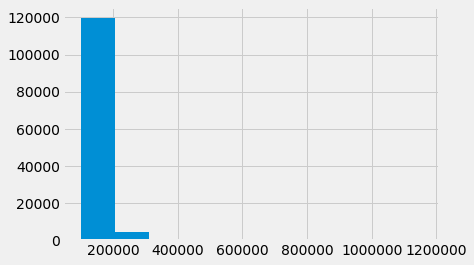

In [88]:
# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

income['Salary ($)'].hist()

The default number of bins is ten. We can easily change this with the optional argument `bins`.

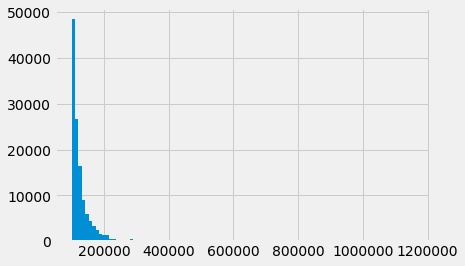

In [91]:
income['Salary ($)'].hist(bins=100)

## 4. Practice Review

**Question 4.1.**<br/>
What is the average employee salary in the Canadian-public-employees-making-over-CAN$100,000 dataset?

In [12]:
...

127251.60404291407

**Question 4.2.** <br/>
How many employees made more than CAN$200,000? 

In [18]:
...

5512

**Question 4.3.**<br/>
What was the maximum salary in the dataset?

In [19]:
...

1155899.14

**Question 4.4.**<br/>
Who made that max salary and what is their job description?<br/>

In [25]:
...

'Jeffrey Lyash'

**Question 4.5.** <br/> What Job Title was most common?

*Hint:* Use the method `describe()` on a DataFrame column. You will see summary information, which you can separate by adding another method (ie to find the frequency of the most common Job Title you would code `income['Job Title'].describe().freq`).

In [39]:
...

'Professor'

**Question 4.6.**<br/>
How many different Employers are included in the dataset?

*Hint:* The method `nunique()` on a DataFrame column (ie a pandas Series) returns the number of unique values. As an aside, the method `unique` returns an array of what those unique values are (try it if you want).

In [57]:
...

1788

**Question 4.7.**<br/> 
How many employees did the University of Ontario Institute of Technology have in this dataset? Again use python to give the answer as a number.

In [61]:
...

216

**Question 4.8.**<br/>
What was the average employee salary of the University of Ontario Institute of Technology in this dataset?

In [62]:
...

142139.12208333338

**Question 4.9.**<br/>
Create a histogram of employee salary of University of Ontario Institute of Technology employees, using 50 bins.

In [66]:
...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002776F11F748>]],
      dtype=object)